# Part 1: Data Preprocessing

Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Importing libraries and the dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# install kaggle api
! pip install -q kaggle

In [ ]:
# upload kaggle API key to colab notebook
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ # copying the fire

In [13]:
# disable API key
! chmod 600 /content/kaggle.json

In [14]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud # copied from kaggle

 79% 52.0M/66.0M [00:00<00:00, 194MB/s]
100% 66.0M/66.0M [00:00<00:00, 180MB/s]


In [15]:
# unzipping the dataset
! unzip -q /content/creditcardfraud.zip

## Data Exploration

In [16]:
dataset = pd.read_csv('/content/creditcard.csv')

In [17]:
dataset.shape

(284807, 31)

In [18]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
# statistical summary
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Dealing with missing values

In [25]:
print(f'Is there any null values : {dataset.isnull().values.any()}')
print(f"How many null values are there : {dataset.isnull().values.sum()}")

Is there any null values : False
How many null values are there : 0


## Dealing with categorical data

In [29]:
display(dataset.select_dtypes(include ='object').columns)
print(f"Number of categorical columns {len(dataset.select_dtypes(include ='object').columns)}")

Index([], dtype='object')

Number of categorical columns 0


## Countplot

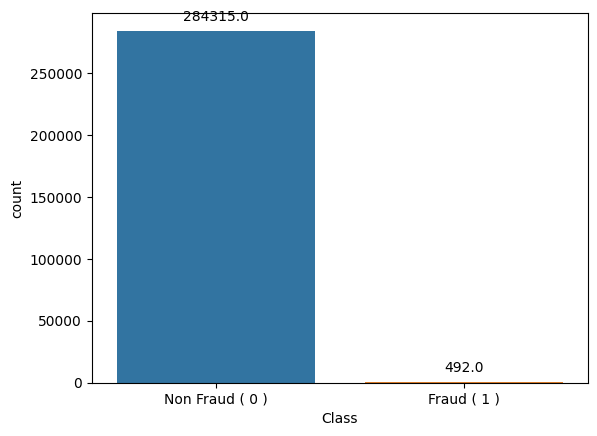

In [88]:
ax = sns.countplot(dataset, x ='Class', label ='Count')
ax.set_xticklabels(["Non Fraud ( 0 )","Fraud ( 1 )"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [31]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [40]:
# Fraud transaction
(dataset.Class == 1).sum()

492

In [41]:
# Non Fraud transaction
(dataset.Class == 0).sum()

284315

## Corrlation matrix and heatmap

In [32]:
dataset_2 = dataset.drop(columns ='Class')


In [33]:
dataset_2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


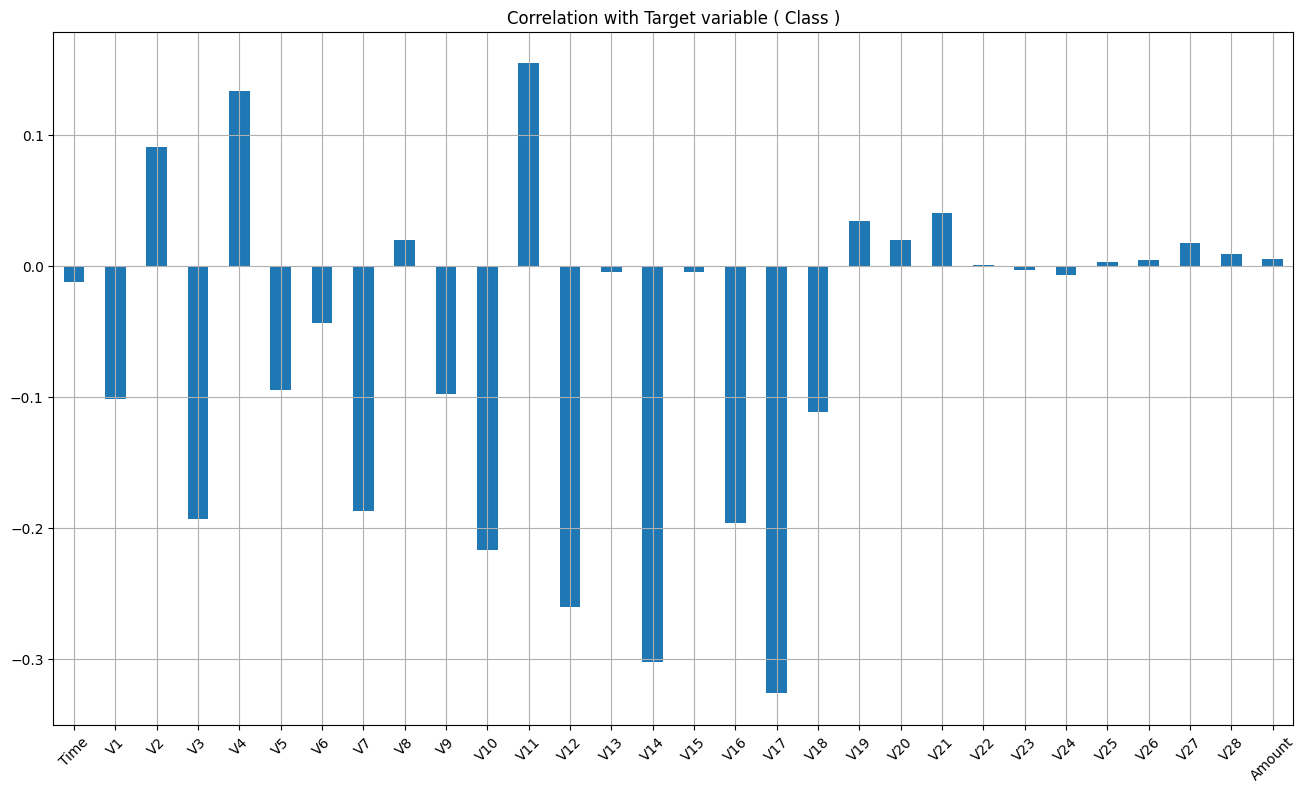

In [42]:
ax = dataset_2.corrwith(dataset['Class']).plot.bar(
    figsize = (16,9), title ="Correlation with Target variable ( Class )", rot = 45, grid = True
)

In [36]:
# correlation matrix
corr = dataset.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

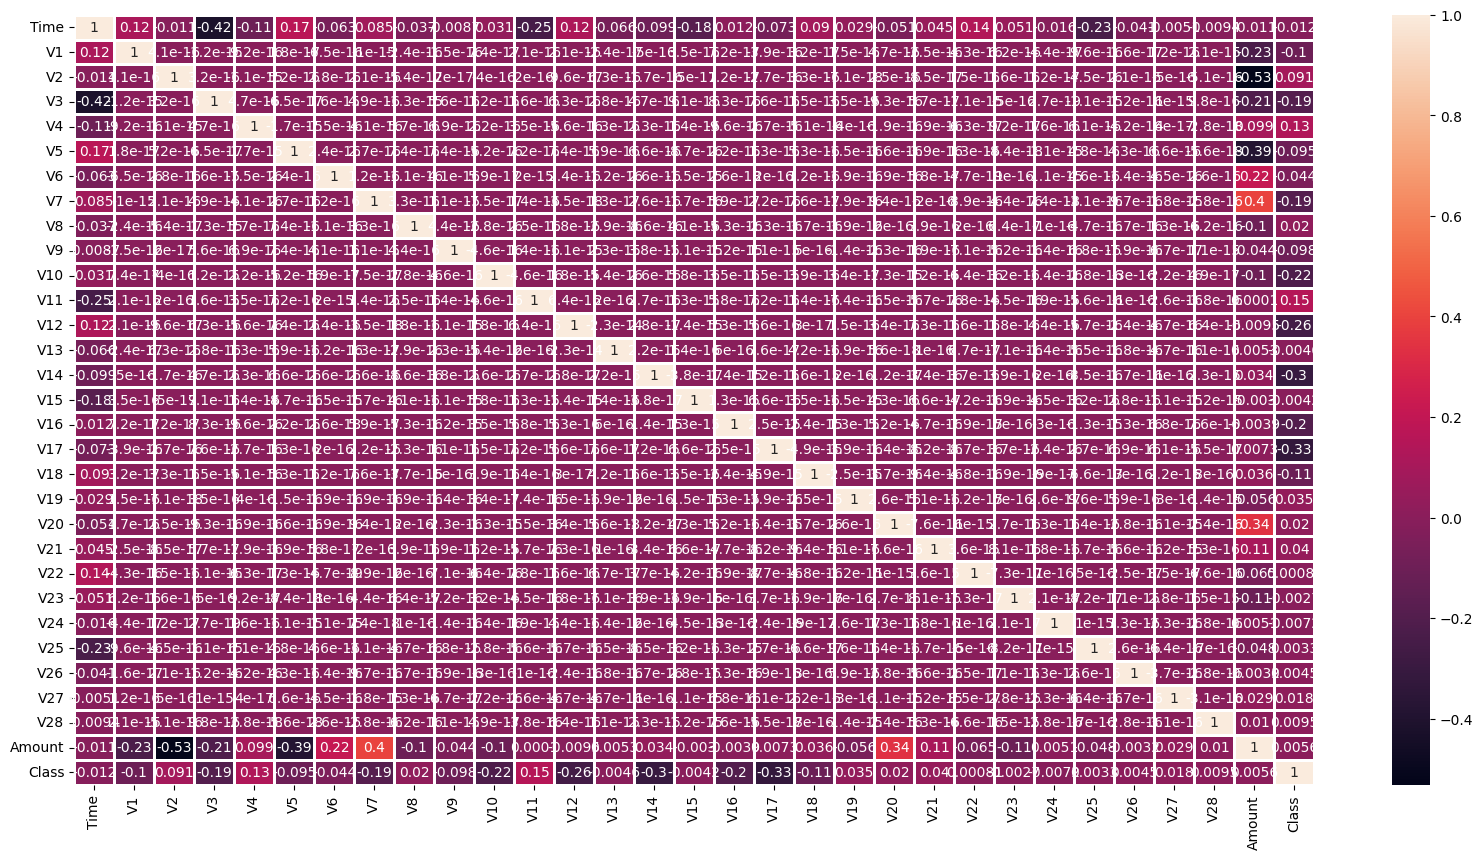

In [43]:
# Heat map
plt.figure( figsize = (20,10))
sns.heatmap(corr, annot=True, linewidth = 2)

## Splitting the dataset into train and test dataset

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
# Matrix of features / independent variable
x = dataset.drop(columns ='Class')


In [48]:
# Target variable
y = dataset['Class']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [50]:
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(227845, 30)

(56962, 30)

(227845,)

(56962,)

## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # mean and sd
x_test = sc.transform(x_test) # only scaling to avoid overfitting

In [53]:
display(x_train)
display(x_test)

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

In [54]:
for n in [x_train.max(), x_train.min(), x_test.max(), x_test.min()]:
  print(n)

78.89097388087012
-71.91367666705455
105.5277670656507
-83.26867418415634


# Part 2: Building the model

## 1) Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
classifier_lr = LogisticRegression(random_state = 0)

In [57]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [58]:
y_pred = classifier_lr.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [60]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

results = pd.DataFrame([['Logistic regression',acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.999192,0.735632,0.876712,0.633663


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56852,     9],
       [   37,    64]])

### Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score

In [66]:
accuracies = cross_val_score(estimator = classifier_lr, X = x_train, y = y_train, cv = 10)
print(f'Average accuracy is : {accuracies.mean()*100 : .2f}%')
print(f'Standard deviation of accuracy is : {accuracies.std() : .4f}')

Average accuracy is :  99.92%
Standard deviation of accuracy is :  0.0002


## 2) Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
classifier_rf = RandomForestClassifier(random_state = 0)
classifier_rf.fit(x_train, y_train)
y_pred = classifier_rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

rf_results = pd.DataFrame([['Random Forest',acc, f1, prec, rec]],
                       columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
results.append(rf_results, ignore_index =True)
results

<ipython-input-69-561ac4bc59e9>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(rf_results, ignore_index =True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.999192,0.735632,0.876712,0.633663


In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56854,     7],
       [   22,    79]])

## 3) SVM

In [72]:
from sklearn.svm import SVC
classifier_svc = SVC(random_state = 0)
classifier_svc.fit(x_train, y_train)
y_pred = classifier_svc.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_res = pd.DataFrame([['SVM',acc, f1, prec, rec]],
              columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
display(model_res)
results.append(model_res, ignore_index = True)
results

,Model,Accuracy,F1,Precision,Recall
0,SVM,0.999333,0.784091,0.92,0.683168


<ipython-input-72-a6434f2a63f4>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(model_res, ignore_index = True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.999192,0.735632,0.876712,0.633663


In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56855,     6],
       [   32,    69]])

## 4) XGBoost Classification

In [74]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier(random_state = 0)
classifier_xg.fit(x_train, y_train)
y_pred = classifier_xg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
model_results_xg = pd.DataFrame([['XGBoost Classification', acc, f1, prec, rec]],
                                columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
model_results_xg

,Model,Accuracy,F1,Precision,Recall
0,XGBoost Classification,0.999544,0.863158,0.921348,0.811881


In [75]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56854,     7],
       [   19,    82]])

# Part 3: Final Model

In [76]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 0)
classifier.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [77]:
y_pred = classifier.predict(x_test)

In [79]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

99.95435553526913


In [80]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56854     7]
 [   19    82]]


### Cross Validation

In [86]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(f'Average accuracy is : {accuracies.mean()*100 : .2f}%')
print(f'Standard deviation of accuracy is : {accuracies.std() : .4f}')

Average accuracy is :  99.96%
Standard deviation of accuracy is :  0.0001


# Part 4: Predicting a single observation

In [81]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
dataset.shape

(284807, 31)

In [83]:
single_obs = [[0.0, -1.359807,	-0.072781,	2.536347,	1.378155,	-0.338321,	0.462388,	0.239599,	0.098698,	0.363787,	0.090794,	-0.551600,	-0.617801,	-0.991390,	-0.311169,	1.468177,	-0.470401,	0.207971,	0.025791,	0.403993,	0.251412,	-0.018307,	0.277838,	-0.110474,	0.066928,	0.128539,	-0.189115,	0.133558,	-0.021053,	149.62]]

In [84]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [85]:
# result is non fraudulent

# Part 5: Conclusion

In conclusion, this project showcases the importance of fraud detection in credit card transactions. The XGBoost model, with an accuracy of 99.95%, proved to be highly effective in identifying fraudulent activities. The comprehensive analysis and model selection process ensure a robust solution to safeguard financial transactions.